In [1]:
from create_table_fpdf2 import PDF

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tnorma import tnorma
from glob import glob
from pylab import rcParams
import os
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from detecta import detect_peaks
rcParams['figure.figsize'] = 12,4
rcParams['savefig.dpi'] = 300

logo_path = 'logo/'
name = 'Park'

now = datetime.now().strftime('%Y%m%d')

/Users/yongseok/opt/anaconda3/envs/ML/lib/python3.11/site-packages/fpdf/__init__.py:39: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(


In [2]:
file_list = glob('players/**/**/process/*csv')
file_list

['players/right/Chominseok/process/Chominseok_008.csv',
 'players/right/Chominseok/process/Chominseok_009.csv',
 'players/right/Chominseok/process/Chominseok_001.csv',
 'players/right/Chominseok/process/Chominseok_014.csv',
 'players/right/Chominseok/process/Chominseok_002.csv',
 'players/right/Chominseok/process/Chominseok_003.csv',
 'players/right/Chominseok/process/Chominseok_013.csv',
 'players/right/Chominseok/process/Chominseok_007.csv',
 'players/right/Chominseok/process/Chominseok_006.csv',
 'players/right/Chominseok/process/Chominseok_012.csv',
 'players/right/Chominseok/process/Chominseok_004.csv',
 'players/right/Chominseok/process/Chominseok_010.csv',
 'players/right/Chominseok/process/Chominseok_011.csv',
 'players/right/Chominseok/process/Chominseok_005.csv',
 'players/left/Leejaerok/process/Leejaerok_009.csv',
 'players/left/Leejaerok/process/Leejaerok_008.csv',
 'players/left/Leejaerok/process/Leejaerok_001.csv',
 'players/left/Leejaerok/process/Leejaerok_003.csv',
 'pl

In [3]:
file = file_list[-1]
df = pd.read_csv(file)
df.columns

Index(['lead_force_x', 'lead_force_y', 'lead_force_z', 'rear_force_x',
       'rear_force_y', 'rear_force_z', 'lead_moment_z', 'rear_moment_z',
       'pelvic_angular_velo', 'torso_angular_velo', 'upperarm_angular_velo',
       'forearm_angular_velo', 'pelvic_forward_tilt', 'pelvic_lateral_tilt',
       'pelvic_rotation', 'torso_forward_tilt', 'torso_lateral_tilt',
       'torso_rotation', 'x_factor', 'shoulder_rotation',
       'shoulder_horizontal_adduction', 'elbow_flexion', 'time', 'to_time',
       'fc_10_time', 'lead_max_grf_time', 'bc_time', 'peak_hand_time'],
      dtype='object')

In [4]:
ks_cols = {
            'pelvic_angular_velo' : ['Pelvic', 'r'],
            'torso_angular_velo' : ['Torso', 'g'],
            'upperarm_angular_velo' : ['Upper Arm','b'],
            'forearm_angular_velo' : ['Forearm','y']
}

pel_cols = {
    'pelvic_forward_tilt' : ['Forward Tilt', 'b'],
    'pelvic_lateral_tilt' : ['Lateral Tilt', 'g'],
    'pelvic_rotation'     : ['Rotation', 'r']
}

tor_cols = {
    'torso_forward_tilt' : ['Forward Tilt', 'b'],
    'torso_lateral_tilt' : ['Lateral Tilt', 'g'],
    'torso_rotation'     : ['Rotation', 'r']
}

grf_y_cols = {
    'rear_force_y' : ['Rear Leg', 'b'],
    'lead_force_y' : ['Lead Leg', 'r']
}

ang_one_cols = {
    'x_factor' : 'X FACTOR',
    'shoulder_rotation' : 'SHOULDER ROTATION',
    'shoulder_horizontal_adduction' : 'SHOULDER HORIZONTAL ADDUCTION',
    'elbow_flexion': 'ELBOW FLEXION'
    }

for_one_cols = {
    'lead_force_z' : 'LEAD LEG GROUND REACTION FORCE (Vertical)',
    'rear_force_z' : 'REAR LEG GROUND REACTION FORCE (Vertical)', 
    'lead_moment_z': 'LEAD LEG TORQUE',
    'rear_moment_z': 'REAR LEG TORQUE'
}

time = df['time']

to_time = df['to_time'][0]
fc_time = df['fc_10_time'][0]
max_grf_time = df['lead_max_grf_time'][0]
bc_time = df['bc_time'][0]
peak_hand_time = df['peak_hand_time'][0]

In [343]:
def grf_y(data, cols, time, to_time, fc_time, max_grf_time, bc_time):
    y = {
    'max'      : {},
    'lead_max'      : {},
    'x_axis_time' : []
    }
    sr = 1000
    max_time = detect_peaks(data['lead_force_y'], mph=40, mpd = sr*0.02, show=True)[0]
    fig, ax = plt.subplots()
    for col in cols:
        plt.plot(time, np.array(data[col]),color = cols[col][-1],label=cols[col][0])
        if col in 'lead_force_y':
            y['max'][col] = round(data[col][max_time], 2)
            y['lead_max'][col] = round(data[col][max_time],2)
            plt.axvline(time[max_time],color = 'firebrick', linestyle='--', alpha=0.5)
        else:
            y['max'][col] = round(data[col].max())
            y['lead_max'][col] = round(data[col][max_time], 2)
            rear_max_time = np.where(data[col] == data[col].max())[0][0]
            y['x_axis_time'] = round(100 * ( y['lead_max'][col] / y['max'][col] ),2)
            plt.axvline(time[rear_max_time],color = 'firebrick', linestyle='--', alpha=0.5)

    
    m = data[cols.keys()].max().max()    
    
    plt.ylabel('Force [% BW]')
    plt.xlabel('Time [s]')
    plt.autoscale(axis='x', tight=True)
    plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
    
    plt.axhline(0,color='k',lw=0.9)
    
    plt.text(time[to_time],y = m, s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[fc_time],y = m, s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[max_grf_time],y = m, s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[bc_time], y = m,s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
    plt.legend()
    plt.tight_layout()
    plt.title('GROUND REACTION FORCE (AP axis)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
    plt.savefig(f"figure/grf_ap.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return y


In [344]:
def one_angle(data, cols, time, to_time, fc_time, max_grf_time, bc_time):
    ang = {
        'to_time'      : {},
        'fc_time'      : {},
        'max_grf_time' : {},
        'bc_time'      : {}
        }
    xf = {
        'peak'  : [],
        'time'  : []
    }
    
    
    for col in cols:
        fig, ax = plt.subplots()
        m = data[col].max()    
        plt.plot(time, np.array(data[col]),color = 'firebrick')
        plt.ylabel('Angle [Deg]')
        plt.xlabel('Time [s]')
        plt.autoscale(axis='x', tight=True)
        plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
        
        plt.axhline(0,color='k',lw=0.9)  
        plt.text(time[to_time],y = m, s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[fc_time],y = m, s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[max_grf_time],y = m, s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[bc_time], y = m,s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
        # plt.legend()
        plt.tight_layout()
        plt.title(f'{cols[col]}')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.grid(axis='y')
        ang['to_time'][col] = round(data[col][to_time], 2)
        ang['fc_time'][col] = round(data[col][fc_time], 2)
        ang['max_grf_time'][col] = round(data[col][max_grf_time], 2)
        ang['bc_time'][col] = round(data[col][bc_time], 2)

        if col in 'x_factor':
            xf['peak'] = round(data[col].min(), 2)
            xf['time'] = np.where(data[col] == data[col].min())[0][0]
            plt.axvline(time[xf['time']], color='firebrick',linestyle = '--',alpha=0.5)
            
        
        

        plt.savefig(f"figure/{col}.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return ang, xf

In [345]:
def kinematic_sequence(data, ks_cols, time, to_time, fc_time, max_grf_time, bc_time,peak_hand_time):
    ks = {
        'peak' : {},
        'time' : {},
        }
    fig, ax = plt.subplots()
    for col in ks_cols:
        if col not in 'forearm_angular_velo':
            plt.plot(time, np.array(data[col]),color = ks_cols[col][-1],label=ks_cols[col][0])
            ks['peak'][col] = round(data[col].max(), 2)
            ks['time'][col] = np.where(data[col] == data[col].max())[0][0]
            plt.axvline(time[ks['time'][col]], color = ks_cols[col][-1], linestyle ='--', alpha= 0.7)
        else:
            plt.plot(time, np.array(data[col]),color = ks_cols[col][-1],label=ks_cols[col][0])
            ks['peak'][col] = round(data[col][peak_hand_time], 2)
            ks['time'][col] = np.where(data[col] == data[col][peak_hand_time])[0][0]
            plt.axvline(time[ks['time'][col]], color = ks_cols[col][-1], linestyle ='--', alpha= 0.7)
            
    plt.ylabel('Angular Velocity [Deg/s]')
    plt.xlabel('Time [s]')
    plt.autoscale(axis='x', tight=True)
    plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
    
    plt.axhline(0,color='k',lw=0.9)  
    plt.text(time[to_time],y = df['forearm_angular_velo'].max(), s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[fc_time],y = df['forearm_angular_velo'].max(), s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[max_grf_time],y = df['forearm_angular_velo'].max(), s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[bc_time], y=df['forearm_angular_velo'].max(),s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
    plt.legend()
    plt.tight_layout()
    plt.title('KINEMATIC SEQUENCE')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
    plt.savefig(f"figure/kinematic.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return ks



In [346]:
def pelvic_angle(data, cols, time, to_time, fc_time, max_grf_time, bc_time):
    pel = {
        'to_time'      : {},
        'fc_time'      : {},
        'max_grf_time' : {},
        'bc_time'      : {}
        }
    fig, ax = plt.subplots()
    for col in cols:
        plt.plot(time, np.array(data[col]),color = cols[col][-1],label=cols[col][0])
        pel['to_time'][col] = round(data[col][to_time], 2)
        pel['fc_time'][col] = round(data[col][fc_time], 2)
        pel['max_grf_time'][col] = round(data[col][max_grf_time], 2)
        pel['bc_time'][col] = round(data[col][bc_time], 2)
    
    m = df[cols.keys()].max().max()
    
    plt.ylabel('Angle [Deg]')
    plt.xlabel('Time [s]')
    plt.autoscale(axis='x', tight=True)
    plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
    
    plt.axhline(0,color='k',lw=0.9)
    plt.text(time[to_time],y = m, s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[fc_time],y = m, s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[max_grf_time],y = m, s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[bc_time], y = m,s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
    plt.legend()
    plt.tight_layout()
    plt.title('PELVIC ANGLE')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
    plt.savefig(f"figure/pelvic.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return pel



In [347]:
def torso_angle(data, cols, time, to_time, fc_time, max_grf_time, bc_time):
    tor = {
        'to_time'      : {},
        'fc_time'      : {},
        'max_grf_time' : {},
        'bc_time'      : {}
        }
    fig, ax = plt.subplots()
    for col in cols:
        plt.plot(time, np.array(data[col]),color = cols[col][-1],label=cols[col][0])
        tor['to_time'][col] = round(data[col][to_time], 2)
        tor['fc_time'][col] = round(data[col][fc_time], 2)
        tor['max_grf_time'][col] = round(data[col][max_grf_time], 2)
        tor['bc_time'][col] = round(data[col][bc_time], 2)
    
    m = df[cols.keys()].max().max()

    plt.ylabel('Angle [Deg]')
    plt.xlabel('Time [s]')
    plt.autoscale(axis='x', tight=True)
    plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
    plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
    
    plt.axhline(0,color='k',lw=0.9)  
    plt.text(time[to_time],y = m, s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[fc_time],y = m, s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[max_grf_time],y = m, s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
    plt.text(time[bc_time], y = m,s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
    plt.legend()
    plt.tight_layout()
    plt.title('TORSO ANGLE')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
    plt.savefig(f"figure/torso.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return tor

In [348]:
def one_force(data, cols, time, to_time, fc_time, max_grf_time, bc_time):
    sr = 1000
    
    rear = {
        'max_at_loading' : {},
        'to_time'        : {},
        'fc_time'        : {},
        'max_grf_time'   : {},
        'bc_time'        : {}
        }

    lead_tq = {
        'max'  : [],
        'time' : []
    }
    
    lead_z = {
        'fc_time' : [],
        'max'     : [],
        'fc-max_time' : [],
        'loading_rate' : []
    }
    
    
    for col in cols:
        fig, ax = plt.subplots()
        plt.plot(time, np.array(data[col]),color = 'firebrick')
        
        if col in ['rear_force_z','rear_moment_z']:
            rear['max_at_loading'][col] = round(data[col].iloc[to_time:fc_time].max(),2)
            loading_time = np.where(data[col] == data[col].iloc[to_time:fc_time].max())[0][0]
            rear['to_time'][col] = round(data[col][to_time], 2)
            rear['fc_time'][col] = round(data[col][fc_time], 2)
            rear['max_grf_time'][col] = round(data[col][max_grf_time], 2)
            rear['bc_time'][col] = round(data[col][bc_time], 2)
            plt.axvline(time[loading_time], color='firebrick',linestyle = '--',alpha=0.5)
            if col == 'rear_force_z':
                yl = 'Force [% BW]'
            else:
                yl = 'Moment [Nm]'
                
        elif col in ['lead_moment_z']:
            lead_tq['max'] = round(data[col].min(), 2)
            lead_tq['time'] = np.where(data[col] == data[col].min())[0][0]
            plt.axvline(time[lead_tq['time']], color='firebrick',linestyle = '--',alpha=0.5)
            yl = 'Moment [Nm]'
        elif col in ['lead_force_z']:
            lead_z['fc_time'] = round(data[col][fc_time], 2)
            lead_z['max'] = round(data[col].max(), 2)
            max_time = np.where(data[col] == data[col].max())[0][0]
            lead_z['fc-max_time'] = (max_time - fc_time) / sr
            lead_z['loading_rate'] = round(( lead_z['max'] - lead_z['fc_time'] ) / lead_z['fc-max_time'], 2)
            plt.axvline(time[max_time], color='firebrick',linestyle = '--',alpha=0.5)
            yl = 'Force [% BW]'
        m = data[col].max()
        
        plt.ylabel(yl)
        plt.xlabel('Time [s]')
        plt.autoscale(axis='x', tight=True)
        plt.axvline(time[to_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[fc_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[max_grf_time], color='k',linestyle = '--',alpha=0.5)
        plt.axvline(time[bc_time], color='k',linestyle = '--',alpha=0.5)
        
        plt.axhline(0,color='k',lw=0.9)  
        plt.text(time[to_time],y = m, s='Toe Off',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[fc_time],y = m, s='Foot Contact',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[max_grf_time],y = m, s='Max GRF',rotation = 90,verticalalignment='top',horizontalalignment='right')
        plt.text(time[bc_time], y = m,s='Ball Contact', rotation=90,verticalalignment='top',horizontalalignment='right')
        # plt.legend()
        plt.tight_layout()
        plt.title(f'{cols[col]}')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.grid(axis='y')
        plt.savefig(f"figure/{col}.png", dpi=300, bbox_inches='tight')
        plt.show()
        

    return rear, lead_tq, lead_z

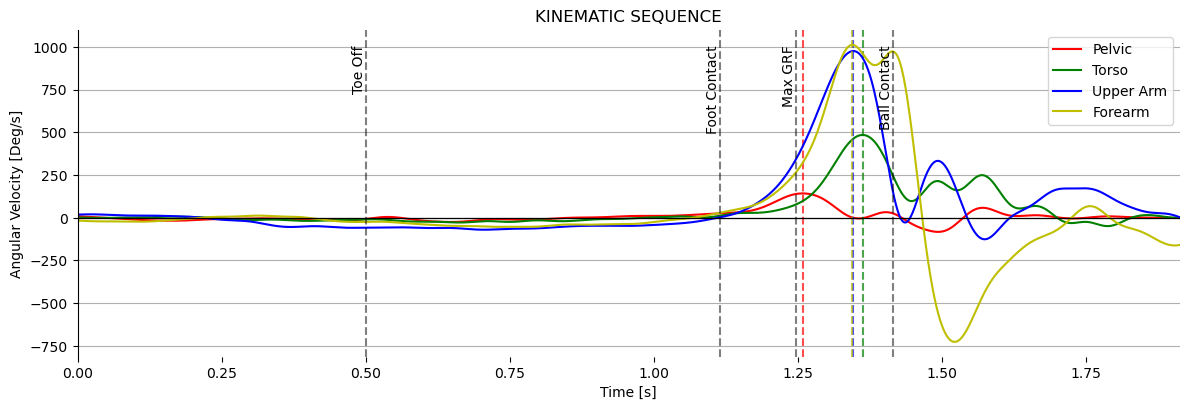

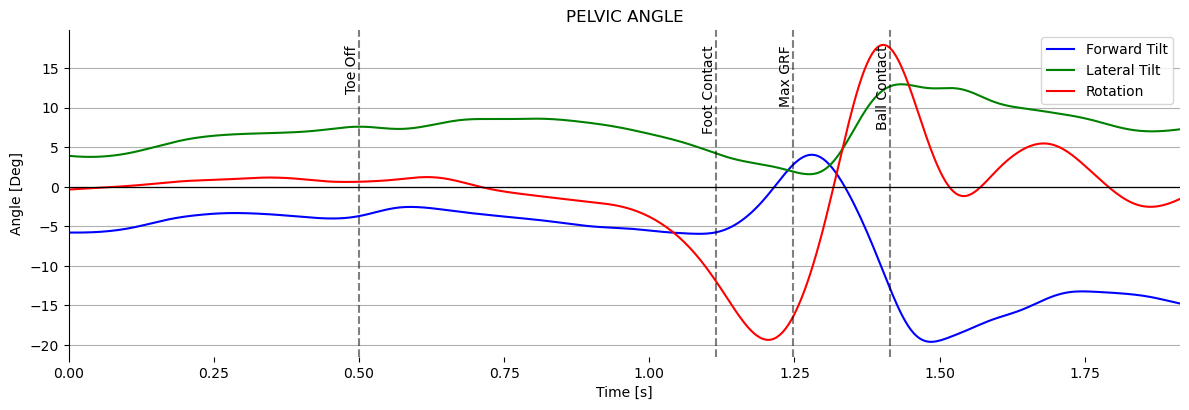

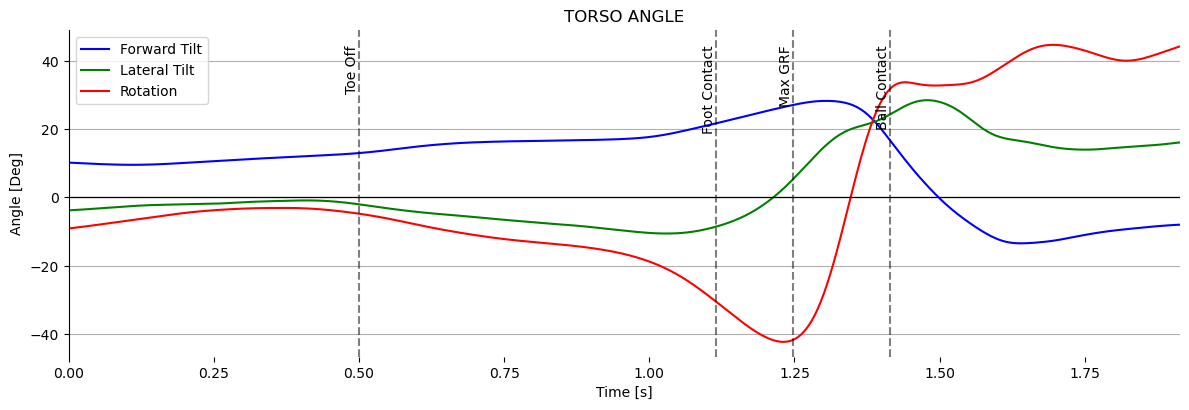

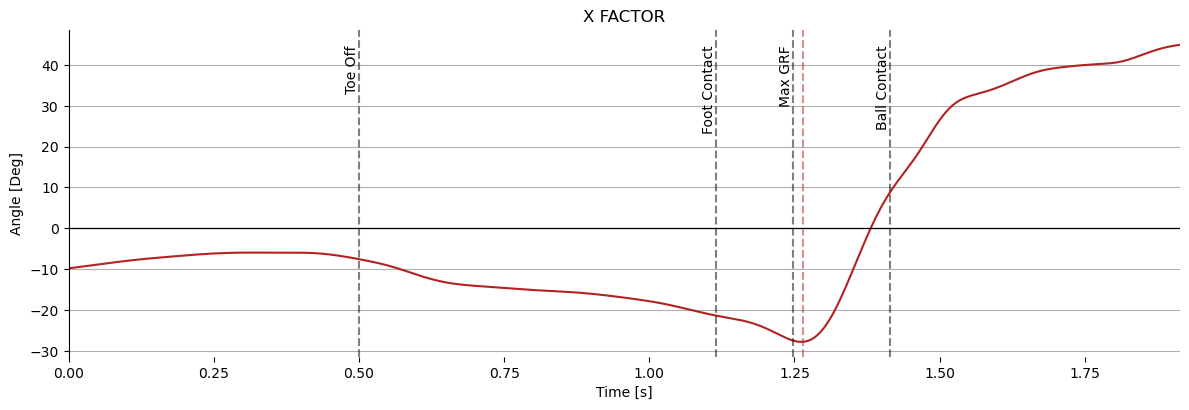

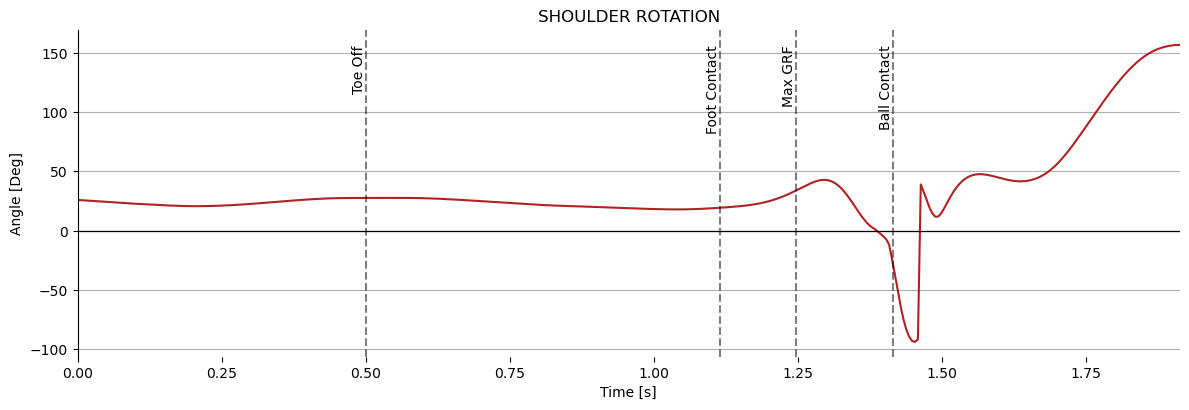

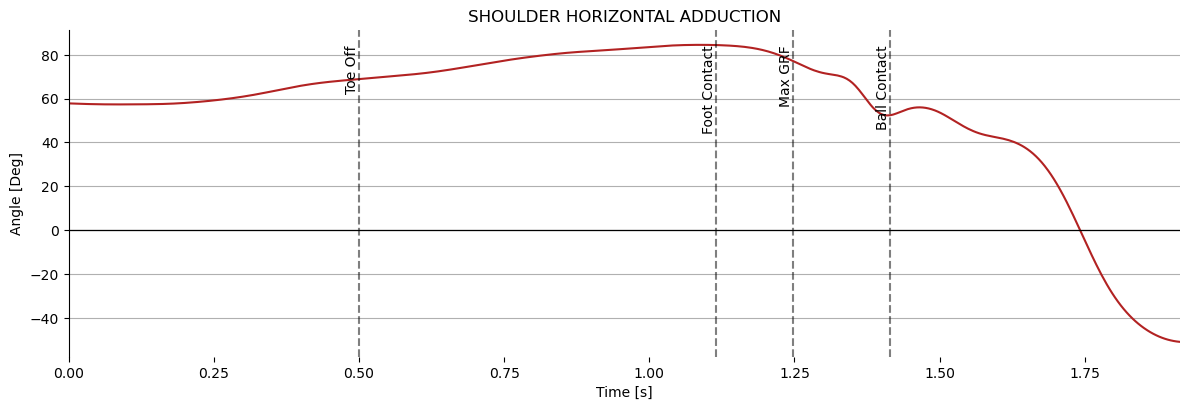

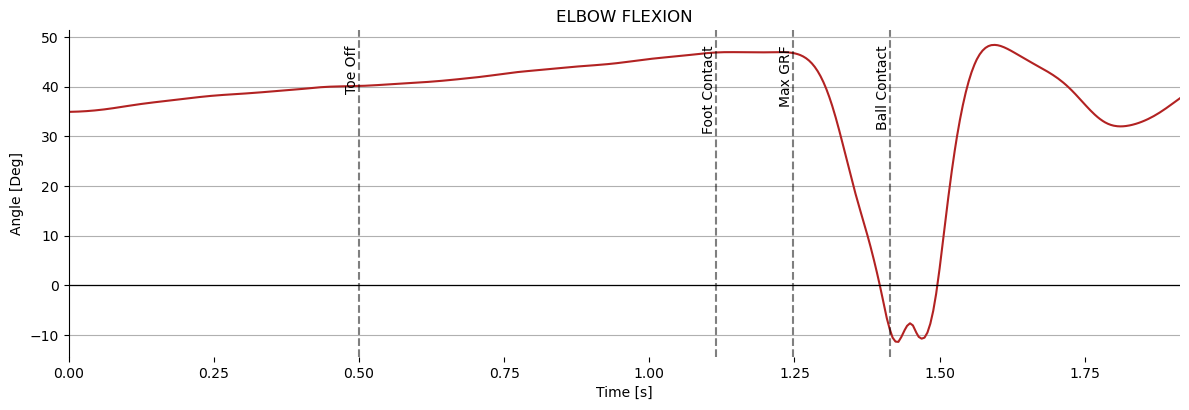

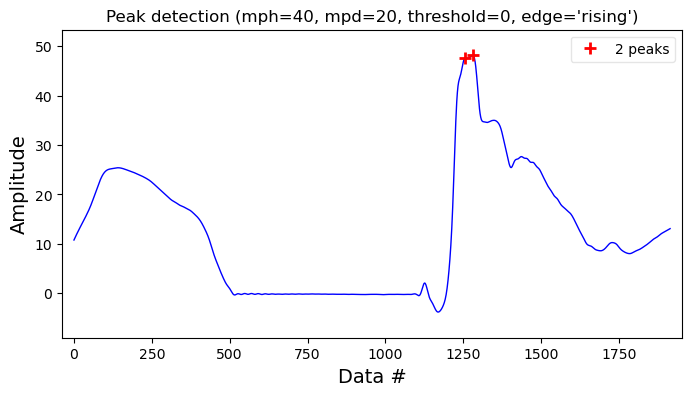

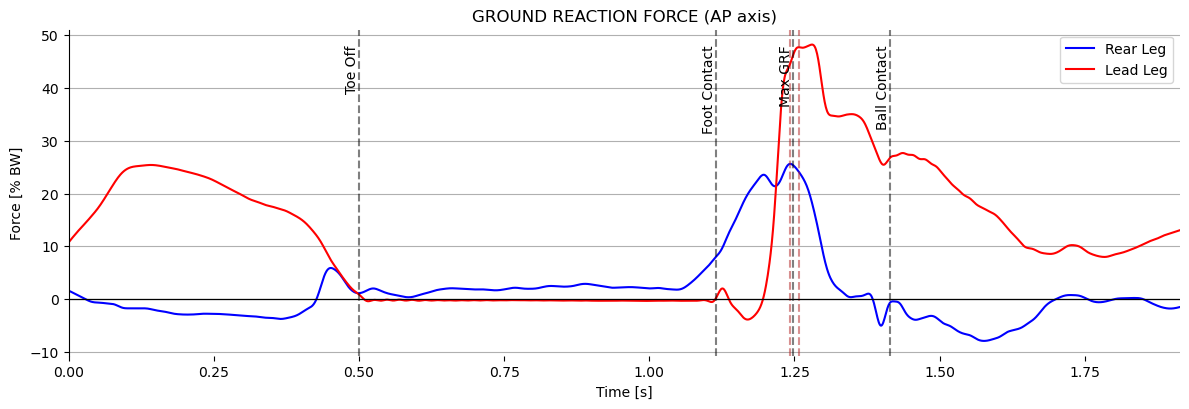

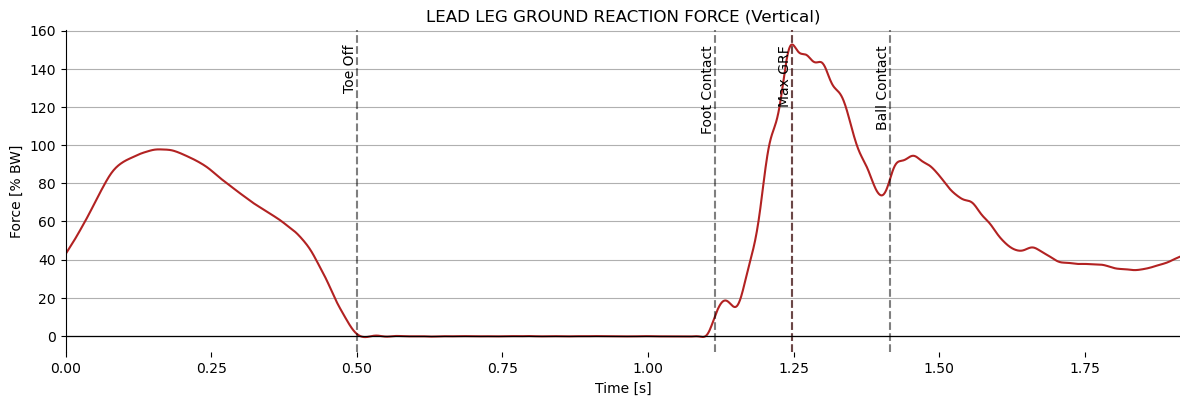

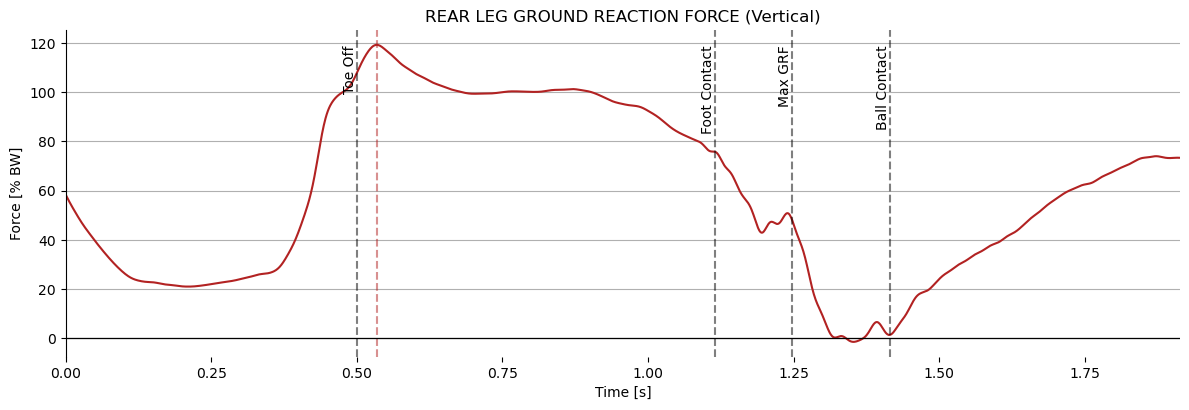

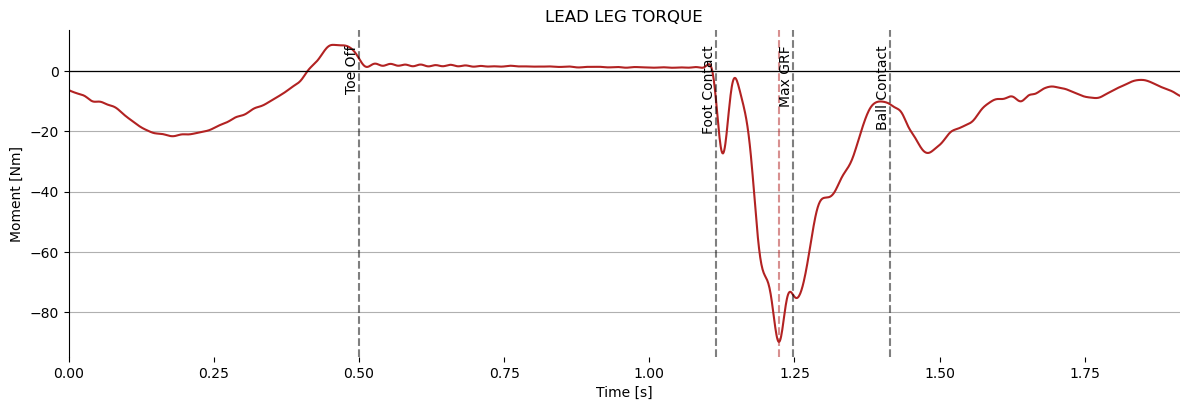

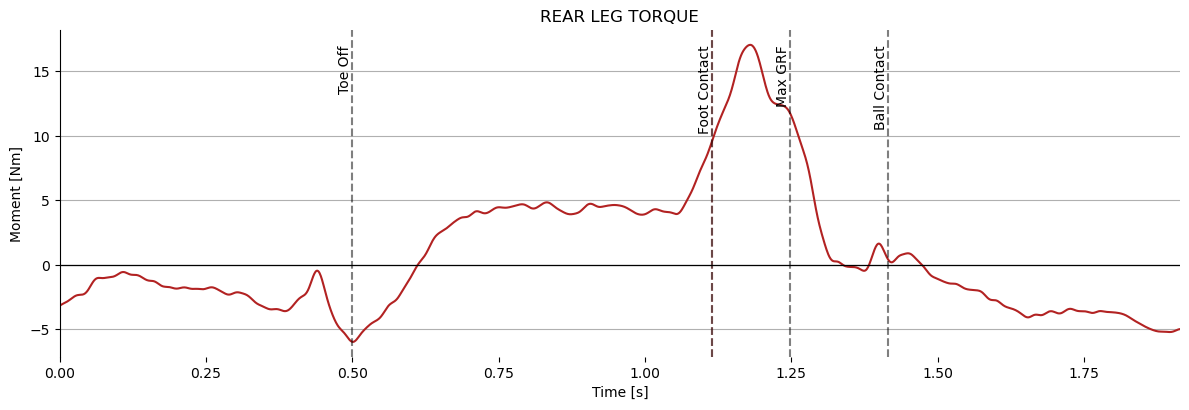

In [349]:
ks = kinematic_sequence(df, ks_cols, time, to_time, fc_time, max_grf_time, bc_time, peak_hand_time)
pel = pelvic_angle(df, pel_cols, time, to_time, fc_time, max_grf_time, bc_time)
tor = torso_angle(df, tor_cols, time, to_time, fc_time, max_grf_time, bc_time)
ang, xf = one_angle(df, ang_one_cols, time, to_time, fc_time, max_grf_time, bc_time)
y = grf_y(df, grf_y_cols, time, to_time, fc_time, max_grf_time, bc_time)
rear, lead_tq, lead_z = one_force(df, for_one_cols, time, to_time, fc_time, max_grf_time, bc_time)